<a href="https://colab.research.google.com/github/egynzhu-personal/siop-python-seminar-2024/blob/main/04_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification
## Predict a categorical outcome
## For example:
1. performance (low,high)
2. turnover (regrettable, non-regrettable, other)
3. potential (low, medium, high)

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
# load the data
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target

## In order to examine model performance, we create a train test split

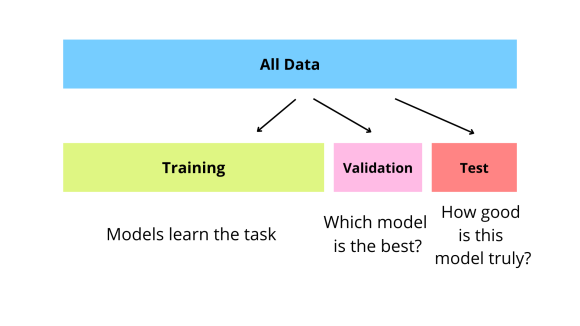

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# initialize logistic regression model
logreg = LogisticRegression(max_iter=200)


In [7]:
# train the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [8]:
y_pred = logreg.predict(X_test)


In [9]:
print('Accuracy of logistic regression classifier on test set:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Decision Tree on Iris Data

In [10]:
from sklearn.tree import DecisionTreeClassifier


In [11]:
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = decision_tree.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generating and printing the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Optimizing hyperparameters using K-Folds Cross Validation
### Hyperparameters are model settings that influence performance
1. Split all data into training data and test data
2. Split training into k-datasets
3. Each fold gets a chance to be training data and test data
4. Vary hyperparameters, find the optimal performance



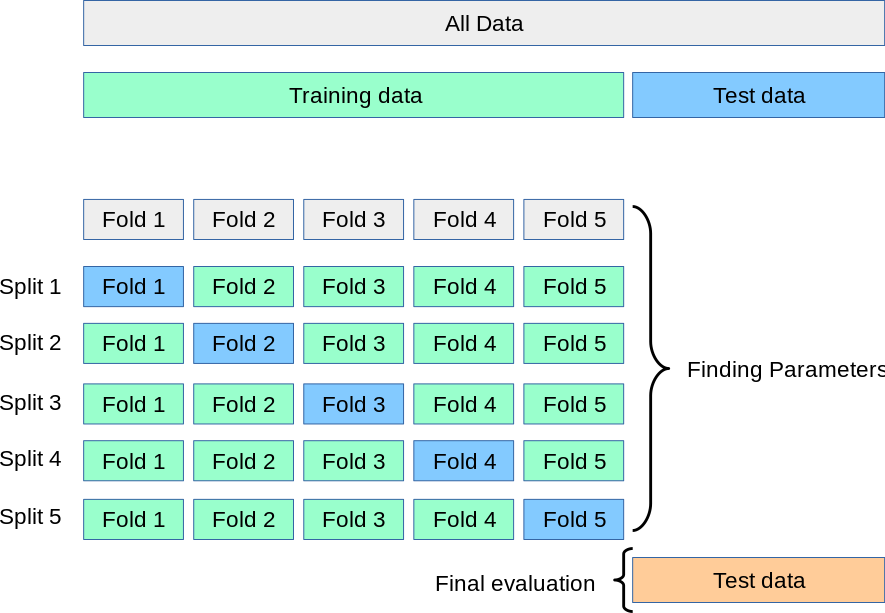

In [12]:
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

In [13]:
# Set the parameters for the grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}


In [14]:
dt = DecisionTreeClassifier()

In [15]:
# k = 5
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

In [16]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [17]:
# this is our best estimator
best_dt = grid_search.best_estimator_


In [18]:
# Predict on the testing data
y_pred = best_dt.predict(X_test)

In [19]:
# Print the classification report
print("Classification report for the best Decision Tree model:")
print(classification_report(y_test, y_pred))

# Optionally, print the best parameters found
print("Best parameters found:", grid_search.best_params_)

Classification report for the best Decision Tree model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best parameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


# Regression
## Predict a continous outcome
## For example:
1. Salary
2. Job Satisfaction
3. Sales Volume
4. Burnout

In [20]:
# download data from Egyn's github
# https://github.com/egynzhu-personal/siop-python-seminar-2024/blob/main/data/hr_data.csv
!wget hr_data.csv https://raw.githubusercontent.com/egynzhu-personal/siop-python-seminar-2024/main/data/hr_data.csv

--2024-04-17 17:26:21--  http://hr_data.csv/
Resolving hr_data.csv (hr_data.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘hr_data.csv’
--2024-04-17 17:26:21--  https://raw.githubusercontent.com/egynzhu-personal/siop-python-seminar-2024/main/data/hr_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51458 (50K) [text/plain]
Saving to: ‘hr_data.csv.2’

hr_data.csv.2       100%[===================>]  50.25K  --.-KB/s    in 0.001s  

2024-04-17 17:26:21 (40.2 MB/s) - ‘hr_data.csv.2’ saved [51458/51458]

FINISHED --2024-04-17 17:26:21--
Total wall clock time: 0.3s
Downloaded: 1 files, 50K in 0.001s (40.2 MB/s)


In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('hr_data.csv')


In [22]:
# inspect data
# we see NaN

df.head()

,age,tenure,performance,attrition,salary,department
0,46.0,4.0,0.451688,Regretted,87700.0,IT
1,29.0,0.0,NaN,Retrained,35000.0,Marketing
2,48.0,13.0,0.596788,Retrained,75500.0,Finance
3,46.0,8.0,0.520668,Retrained,29400.0,Marketing
4,24.0,0.0,NaN,Retrained,64500.0,Marketing


In [23]:
# count nulls

df.isna().sum()

age             50
tenure           0
performance    101
attrition        0
salary           0
department       0
dtype: int64

In [24]:
# example of how to handle missing data
df['performance'].fillna(df['performance'].mean(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)


In [25]:
# convert categorical variables into one hot encoding
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(df[['attrition', 'department']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['attrition', 'department']))


In [26]:
# drop original columns
df.drop(['attrition', 'department'], axis=1, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

In [27]:
df.head()

,age,tenure,performance,salary,attrition_Retrained,attrition_Unregretted,department_HR,department_IT,department_Marketing,department_Operations
0,46.0,4.0,0.451688,87700.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29.0,0.0,0.454339,35000.0,1.0,0.0,0.0,0.0,1.0,0.0
2,48.0,13.0,0.596788,75500.0,1.0,0.0,0.0,0.0,0.0,0.0
3,46.0,8.0,0.520668,29400.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.0,0.0,0.454339,64500.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
# prepare X and y
X = df.drop('salary', axis=1)
y = df['salary']

In [29]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression Predicting Salary

In [30]:
# fit linear regression model

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict and Evaluate
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression Mean Squared Error: {mse_linear}")

Linear Regression Mean Squared Error: 154235940.66454592


## Hyperparameter Tuning, Decision Tree Predicting Salary

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
# Define hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [33]:
# Initialize GridSearchCV
dt_regressor = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, verbose=1, scoring='neg_mean_squared_error')


In [34]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [35]:
# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Predict and Evaluate
best_model = grid_search.best_estimator_
y_pred_dt = best_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Regressor Mean Squared Error: {mse_dt}")

Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
Decision Tree Regressor Mean Squared Error: 207603393.53013736


# HuggingFace and Natural Language Processing (NLP)
## Unstructured text data is ubiquitious, NLP allows us to do several things with textual data
1. Classification - predict categorical outcomes (e.g., sentiment)
2. Regression - predict continous outcomes (e.g., compentencies)
3. Search/question answering - answer domain relevant questions from many documents
4. Chatbots - conversational bots (e.g., HR bots, people analytics knowledge, interview bot)

## Model Access
1. Authorize the consent form here: https://huggingface.co/google/gemma-1.1-2b-it
2. Create an access token: https://huggingface.co/settings/tokens
3. Be sure to connect to GPU! Runtime > Change runtime type > select a gpu

In [36]:
!pip3 install -q -U bitsandbytes==0.42.0
!pip3 install -q -U peft==0.8.2
!pip3 install -q -U trl==0.7.10
!pip3 install -q -U accelerate==0.27.1
!pip3 install -q -U datasets==2.17.0
!pip3 install -q -U transformers==4.38.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 57.6 MB/s eta 0:00:00


## Authenticate your HF Account

In [37]:
from huggingface_hub import notebook_login
notebook_login()

In [38]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig


# Load Alpaca dataset
# this dataset was created by Stanford to train assistant LLMs
# https://huggingface.co/datasets/tatsu-lab/alpaca
# Alpaca is a dataset of 52,000 instructions and demonstrations generated by
# OpenAI's text-davinci-003 engine. This instruction data can be used to conduct instruction-tuning for
# language models and make the language model follow instruction better.

dataset = load_dataset("tatsu-lab/alpaca")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [39]:
dataset

DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output', 'text'],
        num_rows: 52002
    })
})

In [41]:
import torch

# load quantized model
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16)

tokenizer = AutoTokenizer.from_pretrained("google/gemma-1.1-2b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-1.1-2b-it",
    quantization_config=quantization_config,
    device_map = {"":0}
)



tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [42]:
# LORA config
# only train a small portion of the model

from peft import LoraConfig

lora_config = LoraConfig(
    r=4,
    target_modules=["q_proj", "o_proj", "k_proj", "v_proj", "gate_proj", "up_proj", "down_proj"],
    task_type="CAUSAL_LM",
)

In [43]:
# prepare data in the style that is accepted by the model

def formatting_func(example):
    text = f"<start_of_turn>user\n{example['instruction'][0]} {example['input'][0]} <end_of_turn> <start_of_turn>model\n{example['output'][0]}<end_of_turn>"
    return [text]

In [44]:
import transformers
from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    train_dataset=dataset["train"],
    args=transformers.TrainingArguments(
        per_device_train_batch_size=1,
        gradient_accumulation_steps=4,
        warmup_steps=2,
        num_train_epochs=1,
        learning_rate=2e-4,
        fp16=True,
        logging_steps=1,
        output_dir="outputs",
        optim="paged_adamw_8bit"
    ),
    peft_config=lora_config,
    formatting_func=formatting_func,
)

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:223: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/52002 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:290: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(


In [45]:
trainer.train()

Step,Training Loss
1,7.557500
2,7.144800
3,6.232300
4,7.690900
5,8.058600
6,6.538200
7,4.377500
8,6.308600
9,5.051600
10,6.504900


TrainOutput(global_step=13, training_loss=6.1977123113778925, metrics={'train_runtime': 19.5993, 'train_samples_per_second': 2.704, 'train_steps_per_second': 0.663, 'total_flos': 58256578031616.0, 'train_loss': 6.1977123113778925, 'epoch': 0.98})

## Test the model


In [50]:
text = """<start_of_turn>user
Help me brainstorm what to eat for breakfast. <end_of_turn>
<start_of_turn>model"""
device = "cuda:0"
inputs = tokenizer(text, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=50)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

user
Help me brainstorm what to eat for breakfast. 
model

**Healthy Options:**

- Oatmeal with berries and nuts
- Whole-wheat toast with avocado and poached egg
- Greek yogurt with fruit and granola
- Smoothie with fruits, vegetables, and protein powder
- Whole-wheat pancakes with fruit


In [51]:
# notice that we may need to increase the number of max tokens

text = """<start_of_turn>user
Explain how the brain works simply <end_of_turn>
<start_of_turn>model"""
device = "cuda:0"
inputs = tokenizer(text, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=100)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

user
Explain how the brain works simply 
model

**The brain is a complex organ composed of billions of neurons, which are specialized cells that communicate with each other through electrical and chemical signals.**

**1. Neuronal Structure:**

- Neurons are the basic building blocks of the brain.
- They have dendrites, which are extensions of the neuron that receive signals from other neurons.
- Soma, which is the cell body of the neuron, contains the nucleus and other organelles.
- Axons are extensions of the neuron that


# Activity: Train a decision tree to predict turnover on the dataset provided below
1. Load the data
2. Train test split the data using sklearn
3. Fill in any missing values using the column mean (be sure to do this separately for the train and test set)
4. Fit the model (you can use GridsearchCV and hyperparameter tuning, or just fit the model)
5. Evaluate the performance using sklearn's classification report

In [52]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [53]:

!wget hr_data.csv https://raw.githubusercontent.com/egynzhu-personal/siop-python-seminar-2024/main/data/hr_data.csv

df = pd.read_csv('hr_data.csv')
df.head()

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [54]:
# starter code for mean imputation for the missing columns

def mean_impute_missing_data(df, columns=None):
    """
    Perform mean imputation on specified columns with missing (NaN) data in a pandas DataFrame.

    This function modifies the input DataFrame by filling missing values (NaNs) in the specified columns with the mean value of each respective column. If no columns are specified, the function applies mean imputation to all columns in the DataFrame that contain missing values. The function operates in-place and modifies the original DataFrame unless otherwise specified.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame on which to perform the imputation.
    columns : list of str, optional
        A list of column names for which to perform mean imputation. If not provided, imputation is applied to all columns with missing values.

    """


